In [37]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Лабораторная работа №1
## Задание 1
### {Фамилия Имя}, {Номер группы}, Вариант {Номер варианта}, ({Дата})

### Задание

По данным выборки требуется:
- В случае дискретного признака:
    1. Составить вариационный ряд и список вариантов.
    2. Составить ряд распределения частот вариационного ряда и построить полигон частот.
    3. Составить ряд распределения относительных частот вариационного ряда и построить полигон относительных частот.
    4. Составить эмпирическую функцию распределения и построить график эмпирической функции распределения.
- В случае непрерывного признака:
    1. Составить вариационный ряд и список вариантов.
    2. Составить ряд распределения частот вариационного ряда и построить полигон частот.
    3. Составить ряд распределения относительных частот вариационного ряда и построить полигон относительных частот.
    4. Составить интервальный ряд распределения относительных частот вариационного ряда и построить гистограмму интервального ряда относительных частот.
    5. Составить эмпирическую функцию распределенияц и построить график эмпирической функции распределения.

### Данные

In [38]:
lb_author = 'Фамилия, Имя'
lb_num = 1
lb_variant = 59
lb_exercise_num = 1
print(f'Фамилия, Имя: {lb_author}\nНомер лабораторной работы: {lb_num}\nВариант лабораторной работы: {lb_variant}\nНомер задания лабораторной работы: {lb_exercise_num}')

Фамилия, Имя: Фамилия, Имя
Номер лабораторной работы: 1
Вариант лабораторной работы: 59
Номер задания лабораторной работы: 1


In [39]:
task = pd.read_json('input/Данные к заданию №1.json')
task['Описание к данным'][lb_variant - 1]

'Показатели по ряду заводов отрасли за отчетный период по себестоимости единицы продукции (руб.)'

In [40]:
data = pd.Series(task['Данные'][lb_variant - 1])
print(data.tolist())

[8240, 8958, 9230, 7818, 8333, 8500, 8647, 8285, 9032, 7959, 8240, 9230, 8333]


### Всего элементов ряда

In [41]:
data_len = len(data)
print(f'Всего элементов ряда: {data_len}')

Всего элементов ряда: 13


## Пункт 1
**Составить вариационный ряд и список вариантов.**

### Вариационный ряд

In [42]:
data_sort = data.sort_values()
print(data_sort.tolist())

[7818, 7959, 8240, 8240, 8285, 8333, 8333, 8500, 8647, 8958, 9032, 9230, 9230]


### Варианты, $x_i$

In [43]:
unique = sorted(data.unique())
print(unique)

[7818, 7959, 8240, 8285, 8333, 8500, 8647, 8958, 9032, 9230]


## Пункт 2
**Составить ряд распределения частот вариационного ряда и построить полигон частот.**

### Частота, $n_i$

In [44]:
freq = pd.Series(data_sort).value_counts().sort_index()
freq = pd.DataFrame(freq, index=unique)
freq.columns=["Частота"]
freq = freq.T
freq

,7818,7959,8240,8285,8333,8500,8647,8958,9032,9230
Частота,1,1,2,1,2,1,1,1,1,2


### Полигон частот вариационного ряда

In [45]:
fig = px.line(x=unique, y=freq.iloc[0], markers=True, title='Полигон частот вариационного ряда')
fig.show()

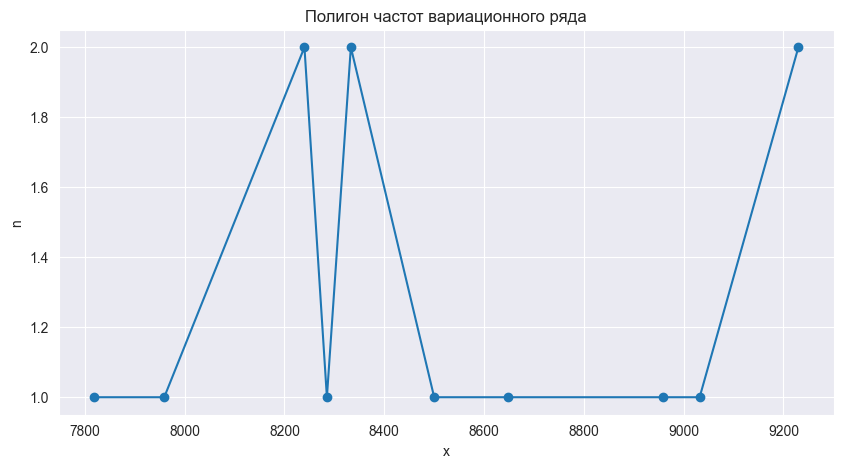

In [46]:
def plot_freq_polygon(x, y, title):
    sns.set_style("darkgrid")
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(title)
    ax.plot(x, y, marker='o')
    ax.set_xlabel("x")
    ax.set_ylabel("n")
    plt.plot()


plot_freq_polygon(x=unique, y=freq.iloc[0], title='Полигон частот вариационного ряда')

## Пункт 3
**Составить ряд распределения относительных частот вариационного ряда и построить полигон относительных частот.**

### Относительная частота, $w_i$

In [47]:
rel_freq = pd.Series(data_sort).value_counts().sort_index() / len(data_sort)
rel_freq = pd.DataFrame(rel_freq, index=unique)
rel_freq.columns=["Относительная частота"]
rel_freq = rel_freq.T
rel_freq

,7818,7959,8240,8285,8333,8500,8647,8958,9032,9230
Относительная частота,0.076923,0.076923,0.153846,0.076923,0.153846,0.076923,0.076923,0.076923,0.076923,0.153846


### Полигон относительных частот вариационного ряда

In [48]:
fig = px.line(x=unique, y=rel_freq.iloc[0], markers=True, title='Полигон относительных частот вариационного ряда')
fig.show()

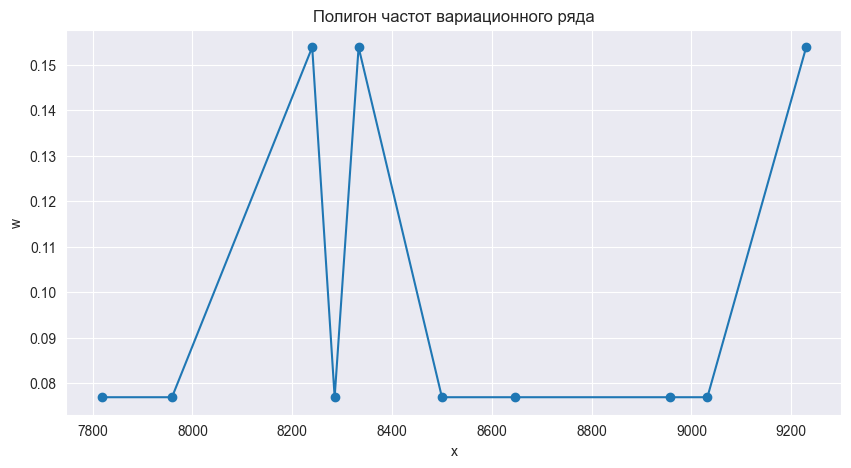

In [49]:
def plot_rel_freq_polygon(x, y, title):
    sns.set_style("darkgrid")
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(title)
    ax.plot(x, y, marker='o')
    ax.set_xlabel("x")
    ax.set_ylabel("w")
    plt.plot()


plot_rel_freq_polygon(x=unique, y=rel_freq.iloc[0], title='Полигон частот вариационного ряда')

## Пункт 4
**Составить эмпирическую функцию распределения и построить график эмпирической функции распределения.**

### Эмпирическая функция распределения $F^*$

In [50]:
emp_func = rel_freq.iloc[0].cumsum()
emp_func.name = "F*"
emp_func = pd.DataFrame(emp_func, index=unique).T
emp_func

,7818,7959,8240,8285,8333,8500,8647,8958,9032,9230
F*,0.076923,0.153846,0.307692,0.384615,0.538462,0.615385,0.692308,0.769231,0.846154,1.0


In [51]:
def emp_func_latex(emp_func):
    print(f'$$\nF^* (x) =\n\\begin{{cases}}')
    for i in range(len(emp_func.values.tolist()[0])):
        if i == 0:
            print(f'0, && x \le {unique[0]:.2f} \\\\')
        elif i == len(emp_func.values.tolist()[0]) - 1:
            print(f'{emp_func.values.tolist()[0][i - 1]:.2f}, && {unique[i - 1]:.2f} < x \le {unique[i]:.2f} \\\\')
            print(f'1.0, && x > {unique[i]:.2f} \\\\')
        else:
            print(f'{emp_func.values.tolist()[0][i - 1]:.2f}, && {unique[i - 1]:.2f} < x \le {unique[i]:.2f} \\\\')
    print('\\end{cases}\n$$')


emp_func_latex(emp_func)

$$
F^* (x) =
\begin{cases}
0, && x \le 7818.00 \\
0.08, && 7818.00 < x \le 7959.00 \\
0.15, && 7959.00 < x \le 8240.00 \\
0.31, && 8240.00 < x \le 8285.00 \\
0.38, && 8285.00 < x \le 8333.00 \\
0.54, && 8333.00 < x \le 8500.00 \\
0.62, && 8500.00 < x \le 8647.00 \\
0.69, && 8647.00 < x \le 8958.00 \\
0.77, && 8958.00 < x \le 9032.00 \\
0.85, && 9032.00 < x \le 9230.00 \\
1.0, && x > 9230.00 \\
\end{cases}
$$


$$
F^* (x) =
\begin{cases}
0, && x \le 7818.00 \\
0.08, && 7818.00 < x \le 7959.00 \\
0.15, && 7959.00 < x \le 8240.00 \\
0.31, && 8240.00 < x \le 8285.00 \\
0.38, && 8285.00 < x \le 8333.00 \\
0.54, && 8333.00 < x \le 8500.00 \\
0.62, && 8500.00 < x \le 8647.00 \\
0.69, && 8647.00 < x \le 8958.00 \\
0.77, && 8958.00 < x \le 9032.00 \\
0.85, && 9032.00 < x \le 9230.00 \\
1.0, && x > 9230.00 \\
\end{cases}
$$

### График эмпирической функции распределения

In [52]:
fig = px.ecdf(x=unique, y=emp_func.values.tolist()[0], markers=True, title='График эмпирической функции распределения')
fig.show()

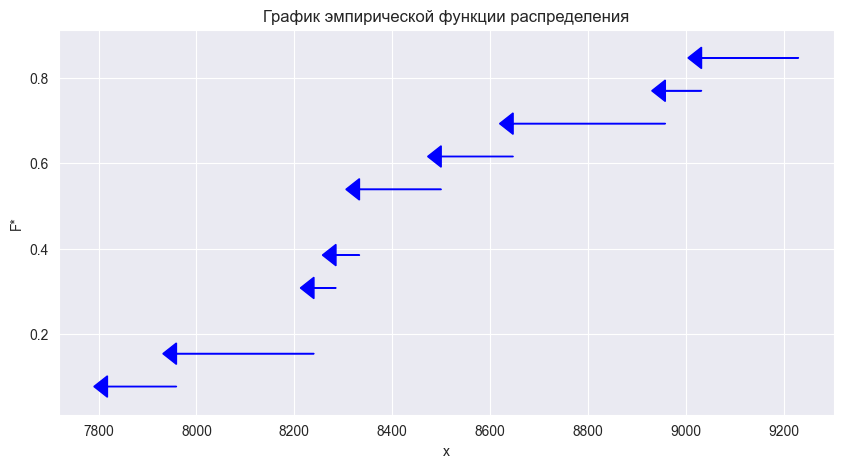

In [53]:
def plot_cdf_func(x, y, title, c):
    fig, ax = plt.subplots(figsize=(10, 5))
    min_y, max_y = min(y), max(y)
    arrow_length = ((max_y - min_y) / len(y)) * c
    for idx in range(len(y) - 1):
        dx = x[idx] - x[idx + 1]
        ax.arrow(x=x[idx + 1], y=y[idx], dx=dx, dy=0, color="blue", head_width=.05, head_length=arrow_length)
    ax.set_title(title)
    ax.set_ylabel("F*")
    ax.set_xlabel("x")
    plt.plot()


plot_cdf_func(unique, emp_func.iloc[0].tolist(), 'График эмпирической функции распределения', 300)

In [54]:
answer = pd.DataFrame()

answer['Фамилия, Имя'] = [lb_author]
answer['Номер лабораторной работы'] = [lb_num]
answer['Вариант лабораторной работы'] = [lb_variant]
answer['Номер задания лабораторной работы'] = [lb_exercise_num]

answer['Вариационный ряд'] = [str(data_sort.tolist())]
answer['Варианты'] = [str(unique)]
answer['Частота'] = [str(freq.values.tolist()[0])]
answer['Относительная частота'] = [str(rel_freq.values.tolist()[0])]
answer['Эмпирическая функция распределения'] = [str(emp_func.values.tolist()[0])]

answer.to_csv('output/ФамилияИмя_ЛБ1_Задание_1.csv', index=False)
answer

,"Фамилия, Имя",Номер лабораторной работы,Вариант лабораторной работы,Номер задания лабораторной работы,Вариационный ряд,Варианты,Частота,Относительная частота,Эмпирическая функция распределения
0,"Фамилия, Имя",1,59,1,"[7818, 7959, 8240, 8240, 8285, 8333, 8333, 850...","[7818, 7959, 8240, 8285, 8333, 8500, 8647, 895...","[1, 1, 2, 1, 2, 1, 1, 1, 1, 2]","[0.07692307692307693, 0.07692307692307693, 0.1...","[0.07692307692307693, 0.15384615384615385, 0.3..."
